# Unit 1 - Modelling and Representations of Systems
# Part 2 - Laplace Transforms, Transfer Functions and S-Plane Plots

- Modelling of electrical and mechanical systems
    - Electric circuits with resistors, capacitors, inductors, op-amps
    - Translational mechanical systems
    - Rotational mechanical systems
- Simulation of a system
    - Response due to initial conditions
    - Step response
    - Response to any input
- Representations
    - Differential equation
    - Transfer function
- Characteristics of a system
    - Settling Time
    - Maximum overshoot
    - Rise time
    - Stability
- Key Concept
    - Poles
    - Zeros
- Plots
    - Time domain response
    - S-Plane

Required Viewing before this lecture:
- Transient response
- 

# From previous part:

Solving differential equations in time domain is tedious, however, we could do it. 

On the other hand over time people have come up with helpful tools that either:
- simplify the task of solving differential equations (for example: Laplace)
- give extra insight (for example: Fourier)
- or both! 

Key insight from transfer function representation:
- poles/zeros of a system

# Consider same example as last part

![1 Disk Graphic Diagram](1diskSimpleGraphic.png "1 Disk Graphic Diagram")
​
A torque is applied to a thin flexible rod. A disk is attached to the rod. The rod is supported by bearings on the left side of the disk. The angular position of the rod at both ends is measured. 
​
We will:
- Derive the transfer function between angular position of the rod at the left side ($\theta_1$) and angular position of the rod at the right side ($\theta_2$),
- Analyze pole-zero map, 
- Analyze step response of system,
- See how to simulate the output of the system for any input using Python.
​
# Schematic Diagram 
![1 Disk Schematic Diagram](1diskSimpleSchematic.png "1 Disk Schematic Diagram")

# Free Body Diagram
![1 Disk Free Body Diagram](1diskSimpleFreeBody.png "1 Disk Free Body Diagram")

Governing differential equation that we derived in previous part:
$$
\begin{align*}
k \theta_1 = J \frac{\text{d}^2 \theta_2}{\text{dt}^2} + b \frac{\text{d} \theta_2}{\text{dt}} + k \theta_2
\end{align*}
$$

Recall the following properties of the Laplace transform:
$$
\begin{align*}
\mathcal{L}[f'(t)] &= sF(s) - f(0) \\
\mathcal{L}[f''(t)] &= s^2F(s) -sf(0) - f(0)'
\end{align*}
$$
        
# In Class Activity!

Using these properties, take the Laplace transform the governing differential equation that we derived earlier:
$$
\begin{align*}
\mathcal{L}[ k \theta_1 ] = \mathcal{L}[ J \frac{\text{d}^2 \theta_2}{\text{dt}^2} + b \frac{\text{d} \theta_2}{\text{dt}} + k \theta_2]
\end{align*}
$$

Gather $\Theta_1(s)$ and $\Theta_2(s)$ terms.

Take Laplace transform of both sides:
$$
\begin{align*}
\mathcal{L}[k \theta_1(t)] &= \mathcal{L}\Big[ J \frac{\text{d}^2 \theta_2(t)}{\text{dt}^2} + b \frac{\text{d} \theta_2(t)}{\text{dt}} + k \theta_2(t) \Big] \\
k \Theta_1(s) &= J s^2 \Theta_2(s) + b s \Theta_2(s) + k \Theta_2(s) - J s \theta_2(0) -J \theta_2'(0) - k \theta_2(0)
\end{align*}
$$
Gather terms and find expression for $\Theta_2(s)$:
$$
\begin{align*}
\Theta_2(s) = \underbrace{\frac{k}{Js^2 + bs+k}}_{\text{Transfer Function}}\Theta_1(s) + \underbrace{\frac{Js\theta_2(0) + J \theta_2'(0) + k \theta_2(0)}{Js^2 + bs+k}}_{\text{Response due to initial conditions}}
\end{align*}
$$

# Step Response

Let the input, in this case $\theta_1(t)$, be a step. 

Step function defined as:
$$
\begin{align*}
1(t) = \begin{cases}
0 & \text{if $t\le0$}, \\
1 & \text{if $t>0$}.
\end{cases}
\end{align*}
$$

What is the Laplace transform of a step? 


In [ ]:
$$
\begin{align*}
\mathcal{L}[1(t)] = \frac{1}{s}
\end{align*}
$$

# In Class Activity!

- Read and understand the following code. 
- Modify the parameters of the system and compare the step response. 
    - What happens when you increase the spring constant? 
    - What happens when you increase the inertia?
    - What happens when you increase the damping?


In [5]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import math

poly: [2]
1
poly: [2]
1
poly: [2]
1
[-0.5+1.32287566j -0.5-1.32287566j  0. +0.j        ]
[-0.5+1.32287566j -0.5-1.32287566j  0. +0.j        ]
[-0.5+0.18898224j -0.5-0.18898224j  1. +0.j        ]
[ 0.-0.75592893j -0.+0.75592893j  1.+0.j        ]


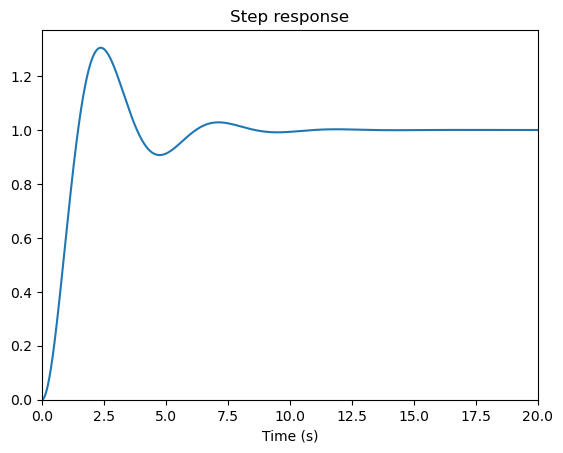

In [14]:
def partial_fraction_expansion_3nd_order_sys(num, den):

    poles = np.roots(den)
    regression_matrix = np.array([[1,1,1], [poles[1]+poles[2], poles[0]+poles[2], poles[0]+poles[1]], [poles[1]*poles[2], poles[0]*poles[2], poles[0]*poles[1]]])
    num_vec = np.zeros(3)
    num_vec[(3-num.shape[0]):3] = num

    coefficients_vec = np.linalg.inv(regression_matrix) @ num_vec  #note @ means matrix multiply in python
    return poles, coefficients_vec


def eval_poly(poly, k):
    print('poly:', poly)
    print(poly.shape[0])
    n = poly.shape[0] - 1

    p_at_k = 0
    for ii in range(n+1):
        p_at_k += poly[ii]*k**(n-ii)
    
    return p_at_k

def enel441_partial_fraction_expansion(num, den):

    poles = np.roots(den)
    num_poles = poles.shape[0]
    coeff = np.zeros(num_poles, dtype=np.csingle)

    for ii in range(num_poles):
        nn = eval_poly(num, poles[ii])

        dd = 1
        for jj in range(num_poles-1):
            if ii != jj:
                dd *= (poles[ii] - poles[jj])
        
        coeff[ii] = nn/dd
    return poles, coeff



def enel441_step_response(num, den, t):
    poles, coefficients = partial_fraction_expansion_3nd_order_sys(num, den)
    poles2, coefficients2 = enel441_partial_fraction_expansion(num, den)

    print(poles)
    print(poles2)
    
    print(coefficients)
    print(coefficients2)
    # Plot the step reponse (assume initial conditions are zero)
    out_step = coefficients[0]*np.exp(poles[0]*t) + coefficients[1]*np.exp(poles[1]*t) + coefficients[2]*np.exp(poles[2]*t)
    
    out_step = np.real(out_step)
    
    fig, ax = plt.subplots(1,1)
    ax.plot(t,out_step.real)
    ax.set_title(r'Step response')
    ax.set_xlabel('Time (s)')
    
    
    plt.xlim(t[0], t[-1])
    y_bottom, y_top = plt.ylim()
    plt.ylim(0, y_top)

    return fig, ax, out_step


# set system parameters
J = 1 
k = 2
b = 1

# construct arrays to define numerator and denominator. Use powers of s: a_3s^3 + a_2s^2 + a_1s + a_0 
# corresponds to array: [a_3, a_2, a_1, a_0]
num = np.array([k])
den = np.array([J, b, k, 0])

# generate the data
N = 10000   #number of points
Tf = 20     #time in seconds of simulation
t = np.linspace(0,Tf,N)

fig, ax, theta_2 = enel441_step_response(num, den, t)

# Characteristics of a step response (Transient Response)

![Step Response Characteristics](step-response.png "Step Response Characteristics")

# In Class Activity!
- add a function that calculates and plots the rise time
- add a function that calculates and plot the maximum overshoot
- add a function that draws (approximate) bounds on the settling time
- add a function that calculates the settling time

Rise Time = 0s
Peak Time = 0.0s
Peak Overshoot = 0%
Settling Time = 0.0s


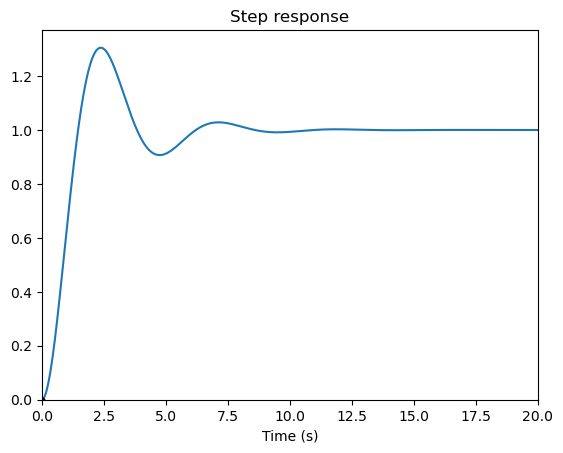

In [4]:
# set system parameters
J = 1 
k = 2
b = 1

# construct arrays to define numerator and denominator. Use powers of s: a_3s^3 + a_2s^2 + a_1s + a_0 
# corresponds to array: [a_3, a_2, a_1, a_0]
num = np.array([k])
den = np.array([J, b, k, 0])

# generate the data
N = 10000   #number of points
Tf = 20     #time in seconds of simulation
t = np.linspace(0,Tf,N)

fig, ax, theta_2 = enel441_step_response(num, den, t)

def calc_rise_time(t, out_step, ax):
    final_value = out_step[-1]
    
    # add your code here to calculate the following variables
    # start_index = ?  # index when step response becomes greater than 10% of final value
    # end_index = ?    # index when step response becomes greater than 90% of final value
    # rise_time = ?    
    
    # stand-in variables so that the code will run. Delete the following three lines.
    start_index = 0
    end_index = 0
    rise_time = 0
    
    ax.plot(t[start_index], out_step[start_index], 'k.')
    ax.plot(t[end_index], out_step[end_index], 'k.')
    
    # uncomment to add annotations (when your function is ready)
    #ax.plot([t[0], t[start_index]], [out_step[start_index], out_step[start_index]], 'k:')
    #ax.plot([t[start_index], t[start_index]], [out_step[start_index], 0], 'k:')
    #ax.plot([t[0], t[end_index]], [out_step[end_index], out_step[end_index]], 'k:')
    #ax.plot([t[end_index], t[end_index]], [out_step[end_index], 0], 'k:')
    
    #ax.arrow(t[start_index], out_step[start_index], rise_time, 0, head_length = 0.1, head_width = 0.025, length_includes_head = True )
    #ax.arrow(t[end_index], out_step[start_index], -rise_time, 0, head_length = 0.1, head_width = 0.025, length_includes_head = True )
    
    #ax.text(t[start_index] + rise_time/2, out_step[start_index] + 0.05, 'Tr', horizontalalignment='center')
    return rise_time


def calc_peak_overshoot(t, out_step, ax):
    final_value = out_step[-1]
    
    # add your code here to calculate the following variables
    # index_peak_overshoot = ?
    # peak_overshoot = ?
    # peak_overshoot_percent = ?
    
    # stand-in variables so that the code will run. Delete the following three lines.
    index_peak_overshoot = 0    # index of the peak value of step response
    peak_overshoot = 0          # max value of step response
    peak_overshoot_percent = 0  
        
    ax.plot(t[index_peak_overshoot], peak_overshoot, 'k.')
    
    #uncomment to add annotations (when your function is ready)
    #ax.plot([t[0], t[-1]], [final_value, final_value], 'k:')
    #ax.plot([t[0], t[index_peak_overshoot]], [peak_overshoot, peak_overshoot], 'k:')
    #ax.plot([t[index_peak_overshoot], t[index_peak_overshoot]], [peak_overshoot, 0], 'k:')
    
    #ax.arrow(t[index_peak_overshoot], final_value, 0, peak_overshoot-final_value, head_length = 0.1, head_width = 0.025, length_includes_head = True )
    #ax.arrow(t[index_peak_overshoot], peak_overshoot, 0, -peak_overshoot+final_value, head_length = 0.1, head_width = 0.025, length_includes_head = True )
    
    #ax.text(t[index_peak_overshoot], final_value + (peak_overshoot-final_value)/2, 'PO', verticalalignment='center')
    
    return t[index_peak_overshoot], peak_overshoot_percent



def calc_settling_time(t, out_step, ax):
    final_value = out_step[-1]
    
    # add your code here to calculate the following variables
    # index_settling_time = ?

    # stand-in variables so that the code will run. Delete the following three lines.
    index_settling_time = 0    # index of the 2% settling time of step response
    
    
    ax.plot(t[index_settling_time], out_step[index_settling_time], 'k.')
    
    #uncomment to add annotations (when your function is ready)
    #ax.plot([t[0], t[-1]], [0.98*final_value, 0.98*final_value], 'k:')
    #ax.plot([t[0], t[-1]], [1.02*final_value, 1.02*final_value], 'k:')
    #if out_step[index_settling_time] > final_value:
    #    ax.text(t[index_settling_time], out_step[index_settling_time], 'Ts', verticalalignment='bottom')
    #else:
    #    ax.text(t[index_settling_time], out_step[index_settling_time], 'Ts', verticalalignment='top')
    
    return t[index_settling_time]



rise_time = calc_rise_time(t, theta_2, ax)
peak_time, peak_overshoot = calc_peak_overshoot(t, theta_2, ax)
settling_time = calc_settling_time(t, theta_2, ax)

print('Rise Time = ', rise_time, 's', sep='' )
print('Peak Time = ', peak_time, 's', sep='' )
print('Peak Overshoot = ', peak_overshoot, '%', sep='' )
print('Settling Time = ', settling_time, 's', sep='' )

# Poles and Zeros of a Transfer Function

Can factor numerator and denominator of transfer function:

$$
\begin{align*}
G(s) &= \frac{b_0 s^n + b_1 s^{n-1} + \cdots + b_{n-1} s + b_{n}}{s^n + a_1s^{n-1} + \cdots + a_{n-1} s + a_{n}} \\
&= \frac{ b_0( s + z_1 )(s + z_2) + \cdots + (s+z_n) }{(s+p_1)(s+p_2) \cdots (s+p_n)}
\end{align*}
$$

where 
- $z_1$, $\ldots$, $z_n$ are the zeros of the transfer function and,
- $p_1$, $\dots,$, $p_n$ are the poles of the transfer function.


# What do the poles mean? What do they represent?

To me it is not very informative to simply say "poles are the points in the s-plane where the transfer function blows up to $\infty$"... There should be a deeper or more tangible meaning.

In order to discover this meaning, let's take the partial fraction expansion of $G(s)$:

$$
\begin{align*}
G(s) = \sum_{k=1}^n \frac{c_k}{s+p_k},
\end{align*}
$$

Take the inverse Laplace transform:
$$
\begin{align*}
g(t) &= \sum_{k=1}^n c_k e^{-p_kt} \\
\end{align*}
$$

What do you notice? When we solved the system in time-domain directly, the general solution of the differential equation was always of the form 
$$
\begin{align*}
g(t) &= \sum_{k=1}^n c_k e^{-p_kt} \\
\end{align*}
$$
which is exactly the same as above. Recall that to construct the general solution, we selected $p_k$ based on the characteristic equation of the differential equation. 

So now we can say that the poles of the system are the exact same as the solutions to the characteristic equation of the differential equation! That is an interesting connection!

We will see in the remainder of this lecture that the poles determine many characteristics of a system. 



# S-Plane Plot

We have determined that the poles are very important. So we want to have a plot to visualize the poles and zeros and be able to infer some of the effects of the pole locations. 

Recall poles/zeros can be real or imaginary. 

Idea: create a plot with
- real parts of the poles/zeros along x-axis
- imaginary parts of the poles/zeros along y-axis


In [ ]:
def enel441_s_plane_plot(num_sys, den_sys, fig=[], ax=[]):
    if not fig: 
        fig, ax = plt.subplots(1,1)
    
    poles_sys = np.roots(den_sys)
    for pp in poles_sys:
        ax.plot(np.real(pp), np.imag(pp), 'bx' )

    zeros_sys = np.roots(num_sys)
    for zz in zeros_sys:
        ax.plot(np.real(zz), np.imag(zz), 'ro')

    plt.xlim(np.min(np.real(poles_sys))-0.5, np.max(np.real(poles_sys))+0.5)
    x_left, x_right = plt.xlim()

    if x_right < 0.5:
        x_right = 0.5

    if x_left > -0.5:
        x_left = -0.5

    plt.xlim(x_left, x_right)
    ax.grid(True)
    ax.spines['left'].set_position('zero')
    # turn off the right spine/ticks
    ax.spines['right'].set_color('none')
    ax.yaxis.tick_left()
    # set the y-spine
    ax.spines['bottom'].set_position('zero')

    # turn off the top spine/ticks
    ax.spines['top'].set_color('none')
    ax.xaxis.tick_bottom()
    ax.set_title('S-Plane Plot')
    ax.set_xlabel('Real[s]')
    ax.set_ylabel('Imag[s]')

    ax.xaxis.set_label_coords(0.5,-0.01)
    ax.yaxis.set_label_coords(-0.01,0.5)
    return fig, ax



In [ ]:
# s-plane plot
den_sys = np.array([J, b, k])
num_sys = np.array([k])
fig, ax = s_plane_plot(num_sys,den_sys)

# In Class Activity!

Select a set of systems, with poles along a vertical line in the s-plane. Make sure you pick a vertical line that ends up with stable systems. Plot the step-responses of each system on the same plot. What do you notice about the step responses? 

In [ ]:
def roots_to_polynomial(roots_poly):
    poly = np.array([1])
    for rr in roots_poly:
        poly = np.convolve(poly, np.array([1, -rr]))
    return np.real(poly)


# pick three polynomials with roots on the same vertical line
roots1 = np.array([-0.5+0.25j, -0.5-0.25j])
roots2 = np.array([-0.5+0.50j, -0.5-0.50j])
roots3 = np.array([-0.5+0.75j, -0.5-0.75j])
den1 = roots_to_polynomial(roots1)
den2 = roots_to_polynomial(roots2)
den3 = roots_to_polynomial(roots3)
num = np.array([1])

fig, ax = s_plane_plot(num,den1)
fig, ax = s_plane_plot(num,den2, fig, ax)
fig, ax = s_plane_plot(num,den3, fig, ax)
ax.arrow(-0.5, 0.25, 0, 0.6, linestyle='--',head_width=0.01, head_length=0.05, fc='k')
ax.arrow(-0.5, -0.25, 0, -0.6, linestyle='--',head_width=0.01, head_length=0.05, fc='k')

Now, select a set of systems with poles along a horizontal line in the s-plane. Make sure you pick a line that ends up with stable systems. Plot the step-responses of each system on the same plot. What do you notice about the step responses? 

In [ ]:
# pick three polynomials with roots on the same vertical line
roots1 = np.array([-0.25+0.5j, -0.25-0.5j])
roots2 = np.array([-0.5+0.5j, -0.5-0.5j])
roots3 = np.array([-0.75+0.5j, -0.75-0.5j])
den1 = roots_to_polynomial(roots1)
den2 = roots_to_polynomial(roots2)
den3 = roots_to_polynomial(roots3)
num = np.array([1])

fig, ax = s_plane_plot(num,den1)
fig, ax = s_plane_plot(num,den2, fig, ax)
fig, ax = s_plane_plot(num,den3, fig, ax)
ax.arrow(-0.25, 0.5, -0.6, 0, linestyle='--',head_width=0.01, head_length=0.05, fc='k')
ax.arrow(-0.25, -0.5, -0.6, 0, linestyle='--',head_width=0.01, head_length=0.05, fc='k')

In [ ]:
# pick three polynomials with roots on the same diagonal line
roots1 = np.array([-0.25+0.25j, -0.25-0.25j])
roots2 = np.array([-0.5+0.5j, -0.5-0.5j])
roots3 = np.array([-0.75+0.75j, -0.75-0.75j])
den1 = roots_to_polynomial(roots1)
den2 = roots_to_polynomial(roots2)
den3 = roots_to_polynomial(roots3)
num = np.array([1])

fig, ax = s_plane_plot(num,den1)
fig, ax = s_plane_plot(num,den2, fig, ax)
fig, ax = s_plane_plot(num,den3, fig, ax)
ax.arrow(-0.25, 0.25, -0.6, 0.6, linestyle='--',head_width=0.01, head_length=0.05, fc='k')
ax.arrow(-0.25, -0.25, -0.6, -0.6, linestyle='--',head_width=0.01, head_length=0.05, fc='k')

This is important, because sometimes requirements of a control system are stated in terms of rise time, settling time and/or maximum overshoot. 

For second order systems, we have mapped these requirements to an area in the s-plane. Thus we know that any system with-in a certain area will meet the specified requirements! 

See video for exact equations.

In a few weeks, we will be using controllers to "place" the poles of a system anywhere in the s-plane. Now we know where we want to place them!

However, these equations only hold for second order systems. Most systems are higher order... What now?



The step response for an $n$th order system is:
$$
\begin{align*}
C(s) = \frac{c_0}{s} + \sum_k^n \frac{c_k}{s+a_k},
\end{align*}
$$
where
- $\frac{1}{s}$ is the response due to the step,
- $c_1, c_2, \ldots$ are the coefficients of the partial fraction expansion (can be complex),
- $a_1, a_2, \ldots$ are the poles of the transfer function (can be complex).
Note: if $c_1$, $c_2$, $\ldots$ are complex, then they always appear in complex conjugate pairs. Same for the poles. 

Taking inverse Laplace transform:
$$
\begin{align*}
c(t) &= c_0u(t) + \sum_k^n c_k e^{-a_kt} \\
&= c_0 u(t) + \underbrace{\sum_m c_m e^{-a_m t}}_{\text{all $a_m$ are real}} + \underbrace{\sum_p 2 r_p e^{- \alpha t}\cos( \beta t - \theta)}_{\text{response due to imaginary poles}}
\end{align*}
$$
where 
- $a_k = \alpha_k + j \beta_k$ (pole expressed in real and imaginary parts), 
- $c_k = r_k e^{j \theta_k}$ (partial fraction coefficient expressed in polar coordinates)

